## 1.Loading Required Libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
pd.options.display.max_columns=None

In [73]:
from warnings import filterwarnings
filterwarnings('ignore')

In [74]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [75]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score,roc_curve,auc

## 2.Loading the Dataset

In [76]:
df_bean=pd.read_excel('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/Kaggle/dry_bean/Dry_Bean_Dataset.xlsx')

In [77]:
df_bean.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [78]:
df_bean.shape

(13611, 17)

## 3. Exploratory Data Analysis

### Visualisation for target column

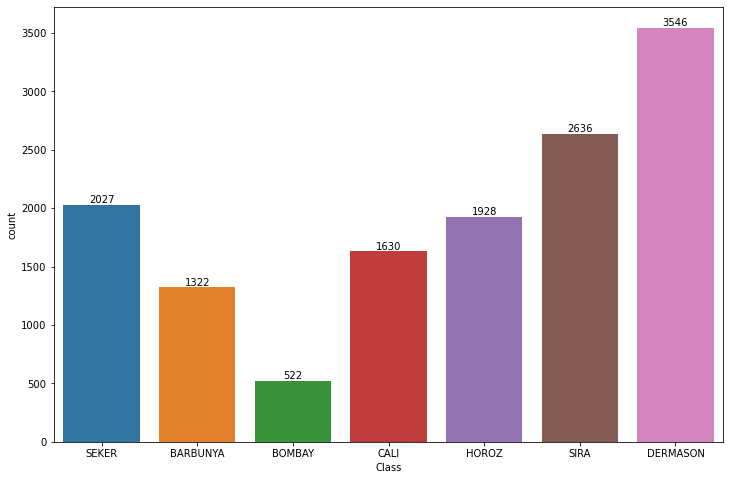

In [79]:
plt.figure(figsize=(12,8))
cp=sns.countplot(df_bean['Class'])
cp.bar_label(cp.containers[0])
plt.show()

### Checking for missing values

In [80]:
df_bean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

We can see that there are no null values in the dataset.

In [81]:
df_bean.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


### Checking for outliers

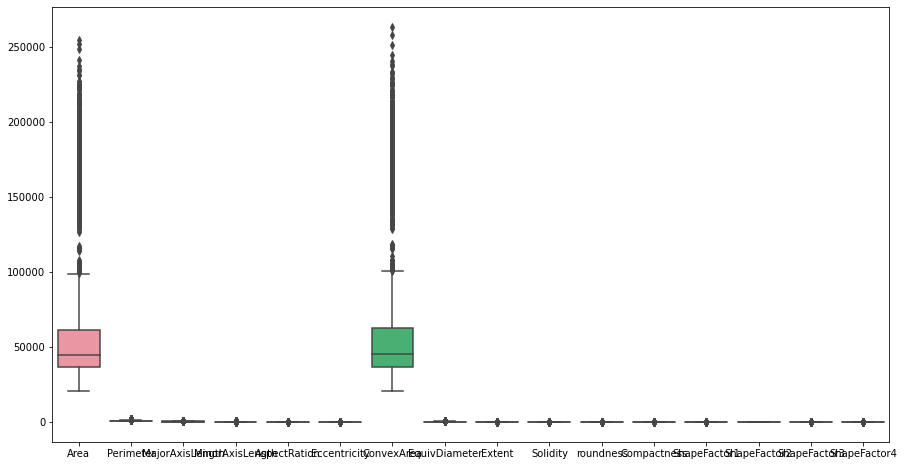

In [82]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_bean)
plt.show()

We can see that there are outliers in the data. We need to treat them.

In [83]:
#Treating the outliers

In [84]:
num=df_bean.select_dtypes(include=np.number)
num.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [85]:
def boundaries(data,variable):
    LL=(data[variable].quantile(.25))-(((data[variable].quantile(.75))-(data[variable].quantile(.25)))*1.5)
    UL=(data[variable].quantile(.75))+(((data[variable].quantile(.75))-(data[variable].quantile(.25)))*1.5)
    return LL,UL

In [86]:
cols=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']

In [87]:
for col in cols:
    LL,UL=boundaries(df_bean,col)
    
    df_bean[col]=np.where(df_bean[col]<LL,LL,
                         np.where(df_bean[col]>UL,UL,df_bean[col]))

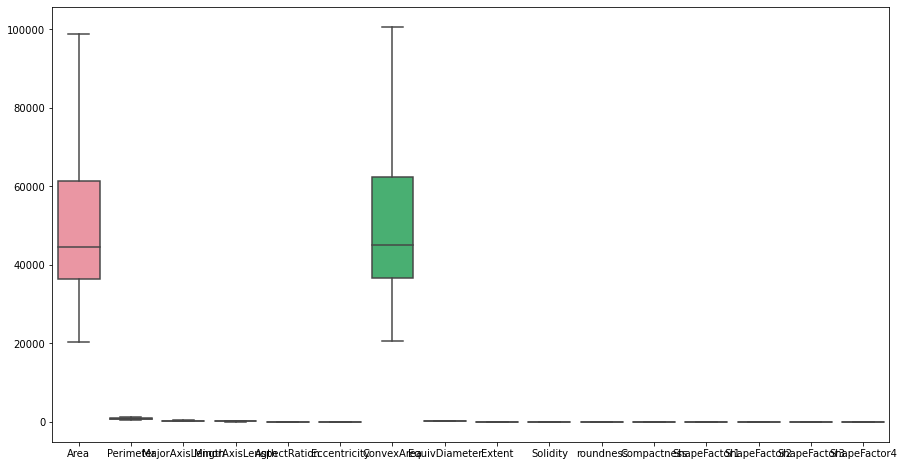

In [88]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_bean)
plt.show()

We can see that the outliers have been treated now.

KeyboardInterrupt: 

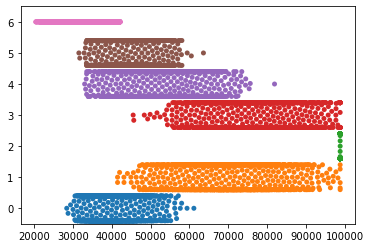

In [92]:
sns.swarmplot(x='Area',y='Class',data=df_bean)
plt.show()

### Testing for Linearity

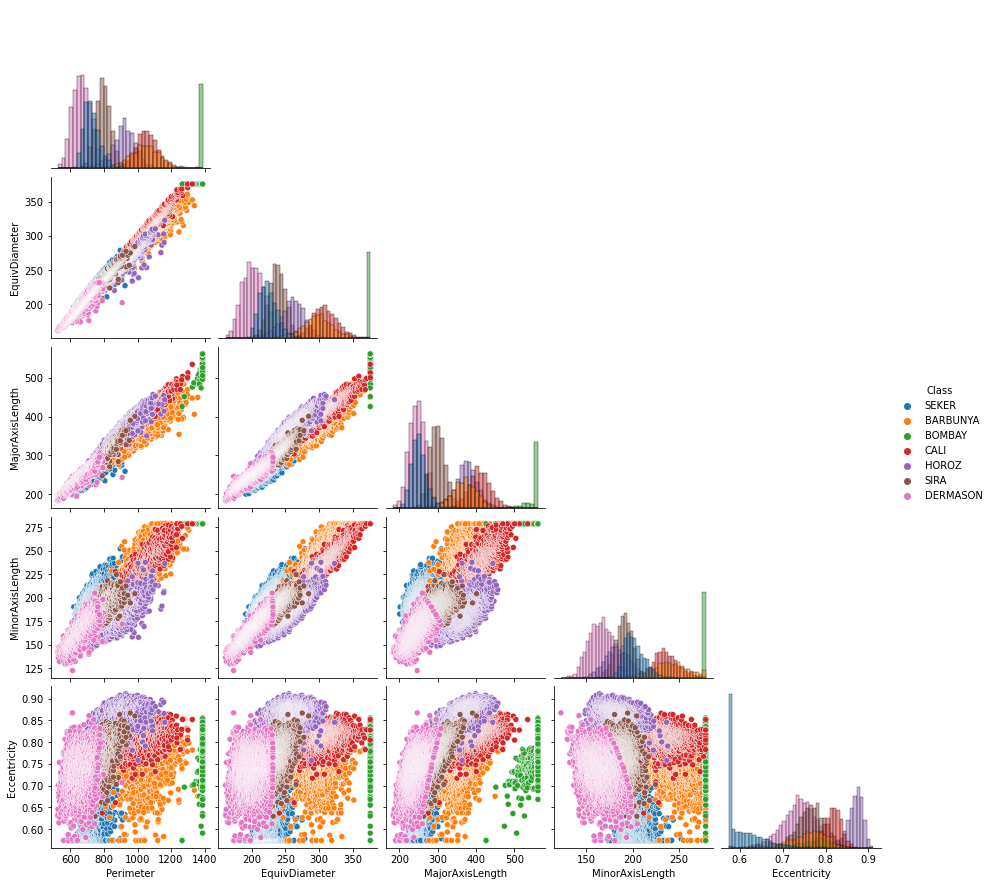

In [19]:
sns.pairplot(df_bean,vars=['Perimeter','EquivDiameter','MajorAxisLength','MinorAxisLength','Eccentricity'],hue='Class',diag_kind='hist',corner=True)
plt.show()

### Coorelation Check

In [19]:
vcorr=df_bean.corr()

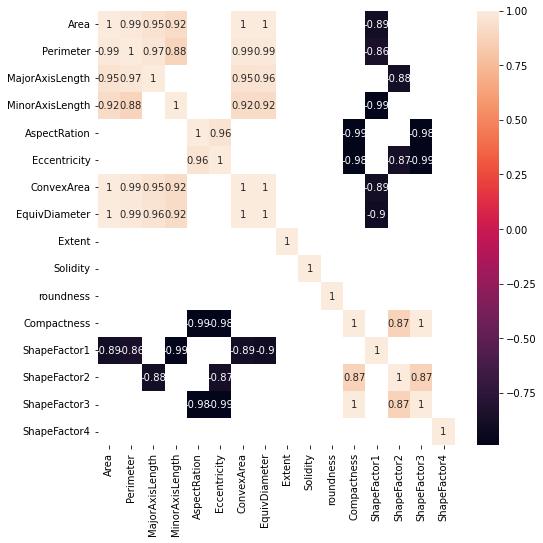

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(vcorr[(vcorr>0.85) | (vcorr<-0.85)],annot=True)
plt.show()

We can find that there are many variables which have a strong correlation.

We can reduce the dimensionality using PCA

### Test for Normality

In [64]:
cols=df_bean.select_dtypes(include=np.number)
cols.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

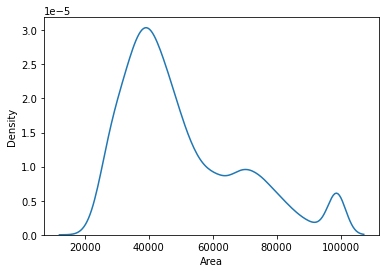

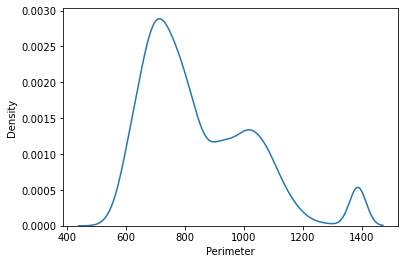

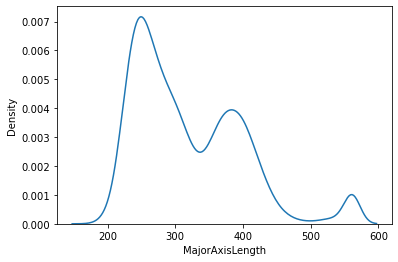

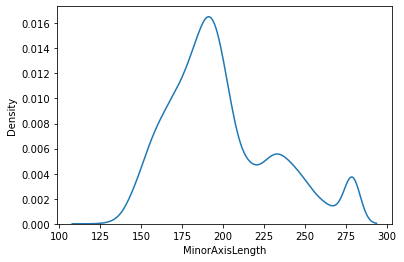

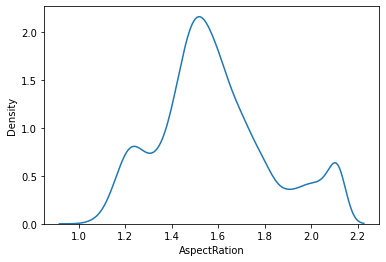

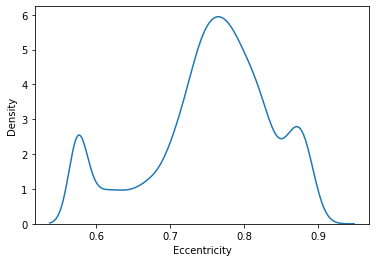

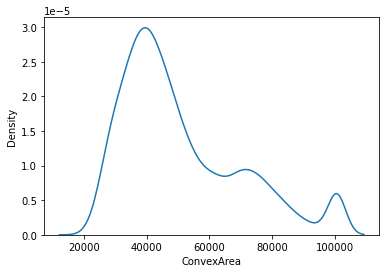

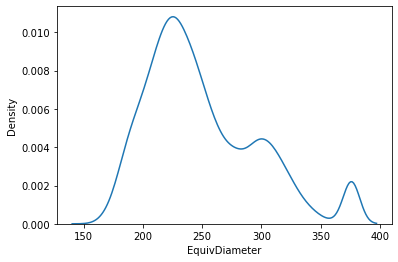

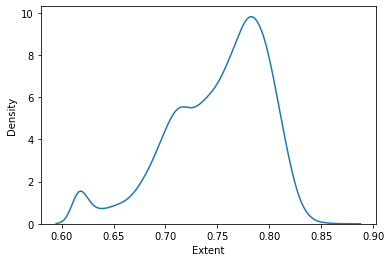

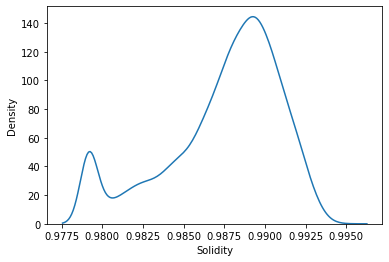

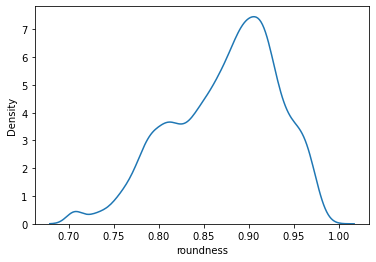

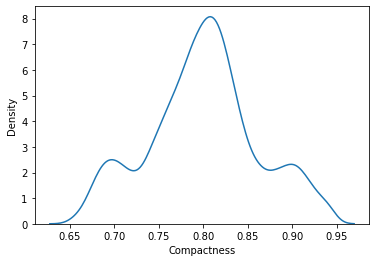

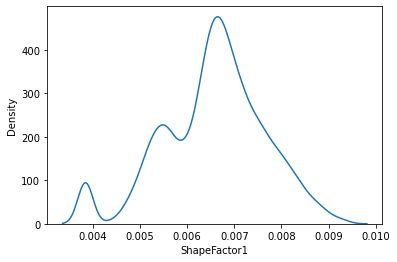

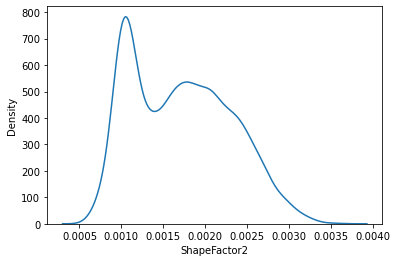

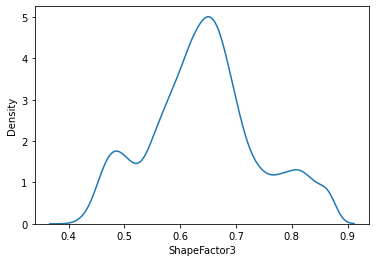

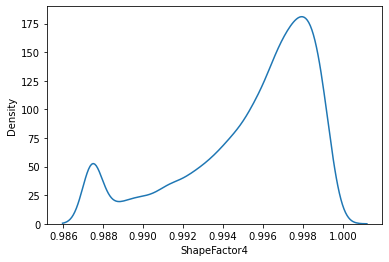

In [65]:
cols=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']

for col in cols:
    sns.kdeplot(x=col,data=df_bean)
    plt.show()

In [21]:
df_bean.to_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/Kaggle/dry_bean/eda.csv',index=False)

### Creating a backup file

In [22]:
df_bean1=df_bean.copy(deep=True)

## 4.Separating the independent and dependent variables

In [23]:
X=df_bean1.drop('Class',axis=1)
y=df_bean1['Class']

## 5.PCA

In [24]:
##Scaling the data

In [25]:
sc=StandardScaler()

In [26]:
X_scaled=sc.fit_transform(X)
df_X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
df_X_scaled.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-1.158101,-1.256001,-1.374254,-0.754155,-1.593134,-2.164759,-1.154709,-1.253256,0.288191,0.391994,1.443596,1.846568,0.693778,2.402173,1.945927,1.021155
1,-1.140074,-1.109279,-1.469528,-0.483939,-2.007702,-2.164759,-1.130895,-1.229363,0.704930,-0.690705,0.230145,2.311820,0.368651,3.100893,2.289880,0.932056
2,-1.105722,-1.182876,-1.316393,-0.691764,-1.541139,-2.164759,-1.103903,-1.184218,0.583210,0.588587,1.269635,1.772042,0.613065,2.235091,1.860826,1.125032
3,-1.072327,-1.067655,-1.344628,-0.490595,-1.773991,-2.164759,-1.050022,-1.140804,0.678177,-2.321377,0.519054,2.089993,0.403730,2.515075,2.226874,-0.352257
4,-1.065308,-1.203915,-1.453058,-0.253460,-2.159512,-2.164759,-1.066020,-1.131737,0.478946,0.961891,1.902527,2.311820,0.109128,3.270983,2.289880,1.155359


In [27]:
pca=PCA()

In [28]:
pca_bean1=pca.fit_transform(df_X_scaled)
pca_bean1

array([[-5.37676436e+00,  1.47937680e+00,  7.98990934e-01, ...,
         6.29556777e-03,  6.32510296e-03, -1.10929799e-03],
       [-5.25019956e+00,  1.98945322e+00,  2.14153981e+00, ...,
         4.72512021e-02, -4.91493987e-02,  6.32518983e-03],
       [-5.18088289e+00,  1.55928733e+00,  5.00748185e-01, ...,
         2.47592345e-03, -5.14334102e-03,  1.24944074e-04],
       ...,
       [-1.51036009e+00,  1.05505138e-01, -3.75459335e-01, ...,
        -2.90635072e-03,  2.29322628e-03,  2.29236805e-04],
       [-1.13915433e+00, -2.54066748e-01,  3.55568688e-01, ...,
        -2.04173434e-03,  1.74447580e-03, -1.31361046e-03],
       [-8.65400824e-01, -7.21946357e-01, -1.15117118e+00, ...,
        -1.21891897e-03,  8.95073175e-04,  1.69692369e-03]])

In [29]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.59180342 0.83631962 0.90489634 0.95573991 0.98398922 0.9913656
 0.99512062 0.99744518 0.99922295 0.99973098 0.9998478  0.99993168
 0.99998411 0.99999332 0.99999867 1.        ]


We can see that with 6 features, we can cater 99% variance.

In [30]:
df_pca_bean1=pd.DataFrame(pca_bean1[:,:6])
df_pca_bean1.head()

,0,1,2,3,4,5
0,-5.376764,1.479377,0.798991,-0.222132,-0.017187,0.183673
1,-5.250200,1.989453,2.141540,0.211530,0.983477,0.722019
2,-5.180883,1.559287,0.500748,-0.032117,0.158855,0.340291
3,-4.370563,1.633692,3.655664,0.892045,0.335862,0.085615
4,-5.912646,2.678757,0.513204,-0.348316,-0.273724,0.232270


In [31]:
#checking for correlation

In [32]:
vcorr=df_pca_bean1.corr()

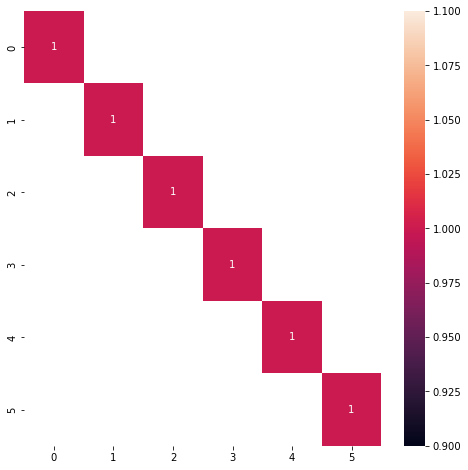

In [33]:
plt.figure(figsize=(8,8))
sns.heatmap(vcorr[(vcorr>0.85) | (vcorr<-0.85)],annot=True)
plt.show()

We can find that the high correlation which existed earlier has been treated now.

## 6.Splitting into train and test set

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [35]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10888, 16), (2723, 16), (10888,), (2723,))

In [36]:
#Checking the y_train

In [37]:
y_train.value_counts()

DERMASON    2841
SIRA        2115
SEKER       1622
HOROZ       1542
CALI        1297
BARBUNYA    1052
BOMBAY       419
Name: Class, dtype: int64

We can find that this is an imbalanced class. We need to balance it using SMOTE.

## 7.SMOTE (Balancing the target class)

In [38]:
oversample=SMOTE()

In [39]:
X_train,y_train=oversample.fit_resample(X_train,y_train)

In [40]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((19887, 16), (2723, 16), (19887,), (2723,))

In [41]:
y_train.value_counts()

BARBUNYA    2841
SIRA        2841
CALI        2841
HOROZ       2841
DERMASON    2841
SEKER       2841
BOMBAY      2841
Name: Class, dtype: int64

## 8.Label Encoding the target variable

In [42]:
le=LabelEncoder()

In [70]:
y_train=le.fit_transform(y_train)

In [44]:
y_test=le.fit_transform(y_test)

## 9.Scaling the data

In [45]:
sc=StandardScaler()

In [46]:
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

## 10.Selecting the best parameters

In [47]:
#GridSearchCV

In [48]:
rf=RandomForestClassifier()
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [49]:
tuned_parameters={'n_estimators':[85,100],'min_samples_split':[15,20],'max_depth':[8,10]}

In [50]:
gs_model=GridSearchCV(estimator=rf,param_grid=tuned_parameters,cv=5)
gs_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10], 'min_samples_split': [15, 20],
                         'n_estimators': [85, 100]})

In [51]:
print('best parameters are: ',gs_model.best_params_)

best parameters are:  {'max_depth': 10, 'min_samples_split': 15, 'n_estimators': 100}


In [52]:
#finding the no. of neighbors for KNN classifier

In [53]:
k_values=range(3,21)

In [54]:
acc_score={}

In [55]:
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    y_pred=knn.predict(X_test_scaled)
    acc_score[k]=accuracy_score(y_test,y_pred)

In [56]:
max(acc_score.values())

0.9280205655526992

In [57]:
max(acc_score,key=acc_score.get)

8

## 11.Model Building

In [67]:
models=[DecisionTreeClassifier(),RandomForestClassifier(),
        RandomForestClassifier(n_estimators=100,min_samples_split=15,max_depth=10),XGBClassifier(dual=False),
       KNeighborsClassifier(n_neighbors=8),AdaBoostClassifier(),GradientBoostingClassifier(),
       LGBMClassifier(),CatBoostClassifier(),SVC(kernel='linear'),SVC(kernel='rbf'),SVC(kernel='sigmoid'),SVC(kernel='poly'),GaussianNB()]

In [68]:
for i in range(14):
    models[i].fit(X_train_scaled,y_train)
    
    print(f'{models[i]}: ')
    y_pred=models[i].predict(X_test_scaled)
    
    print('Accuracy: ',accuracy_score(y_test,y_pred))
    
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test,y_pred))
    
    print('Classification Report: ')
    print(classification_report(y_test,y_pred))
    print()

DecisionTreeClassifier(): 
Accuracy:  0.8953360264414248
Confusion Matrix: 
[[235   0  22   1   3   1   8]
 [  0 103   0   0   0   0   0]
 [ 24   0 303   0   5   1   0]
 [  0   0   0 633   7   9  56]
 [  1   0  13   1 361   0  10]
 [  3   0   1   9   0 383   9]
 [  3   0   7  64  16  11 420]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       270
           1       1.00      1.00      1.00       103
           2       0.88      0.91      0.89       333
           3       0.89      0.90      0.90       705
           4       0.92      0.94      0.93       386
           5       0.95      0.95      0.95       405
           6       0.83      0.81      0.82       521

    accuracy                           0.90      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.89      0.90      0.90      2723


RandomForestClassifier(): 
Accuracy:  0.9258171134777818
Confusion Matrix: 
[[242   

0:	learn: 1.5665062	total: 43.3ms	remaining: 43.3s
1:	learn: 1.3414533	total: 81.6ms	remaining: 40.7s
2:	learn: 1.1662186	total: 121ms	remaining: 40.3s
3:	learn: 1.0342551	total: 155ms	remaining: 38.6s
4:	learn: 0.9335275	total: 193ms	remaining: 38.5s
5:	learn: 0.8471516	total: 229ms	remaining: 38s
6:	learn: 0.7739404	total: 267ms	remaining: 37.9s
7:	learn: 0.7121354	total: 305ms	remaining: 37.8s
8:	learn: 0.6594367	total: 342ms	remaining: 37.6s
9:	learn: 0.6097074	total: 378ms	remaining: 37.4s
10:	learn: 0.5681880	total: 413ms	remaining: 37.2s
11:	learn: 0.5305956	total: 450ms	remaining: 37.1s
12:	learn: 0.4966443	total: 488ms	remaining: 37.1s
13:	learn: 0.4677993	total: 527ms	remaining: 37.1s
14:	learn: 0.4408315	total: 561ms	remaining: 36.9s
15:	learn: 0.4169137	total: 598ms	remaining: 36.8s
16:	learn: 0.3963524	total: 634ms	remaining: 36.7s
17:	learn: 0.3781278	total: 671ms	remaining: 36.6s
18:	learn: 0.3608935	total: 707ms	remaining: 36.5s
19:	learn: 0.3458443	total: 745ms	remaini

165:	learn: 0.1186073	total: 6.5s	remaining: 32.7s
166:	learn: 0.1184041	total: 6.54s	remaining: 32.6s
167:	learn: 0.1182484	total: 6.58s	remaining: 32.6s
168:	learn: 0.1179895	total: 6.62s	remaining: 32.5s
169:	learn: 0.1178515	total: 6.65s	remaining: 32.5s
170:	learn: 0.1175878	total: 6.69s	remaining: 32.4s
171:	learn: 0.1173553	total: 6.73s	remaining: 32.4s
172:	learn: 0.1170842	total: 6.77s	remaining: 32.4s
173:	learn: 0.1169517	total: 6.81s	remaining: 32.3s
174:	learn: 0.1167249	total: 6.84s	remaining: 32.3s
175:	learn: 0.1166168	total: 6.88s	remaining: 32.2s
176:	learn: 0.1164374	total: 6.92s	remaining: 32.2s
177:	learn: 0.1161440	total: 6.96s	remaining: 32.1s
178:	learn: 0.1159832	total: 6.99s	remaining: 32.1s
179:	learn: 0.1158457	total: 7.03s	remaining: 32s
180:	learn: 0.1157487	total: 7.07s	remaining: 32s
181:	learn: 0.1156568	total: 7.11s	remaining: 31.9s
182:	learn: 0.1153516	total: 7.15s	remaining: 31.9s
183:	learn: 0.1152034	total: 7.2s	remaining: 31.9s
184:	learn: 0.1150

327:	learn: 0.0964683	total: 13s	remaining: 26.7s
328:	learn: 0.0964104	total: 13.1s	remaining: 26.6s
329:	learn: 0.0962879	total: 13.1s	remaining: 26.6s
330:	learn: 0.0961513	total: 13.1s	remaining: 26.6s
331:	learn: 0.0960712	total: 13.2s	remaining: 26.5s
332:	learn: 0.0960431	total: 13.2s	remaining: 26.5s
333:	learn: 0.0959162	total: 13.3s	remaining: 26.5s
334:	learn: 0.0957956	total: 13.3s	remaining: 26.4s
335:	learn: 0.0956869	total: 13.4s	remaining: 26.4s
336:	learn: 0.0955394	total: 13.4s	remaining: 26.4s
337:	learn: 0.0954848	total: 13.4s	remaining: 26.3s
338:	learn: 0.0953271	total: 13.5s	remaining: 26.3s
339:	learn: 0.0952226	total: 13.5s	remaining: 26.2s
340:	learn: 0.0951164	total: 13.6s	remaining: 26.2s
341:	learn: 0.0950445	total: 13.6s	remaining: 26.2s
342:	learn: 0.0949606	total: 13.7s	remaining: 26.1s
343:	learn: 0.0948483	total: 13.7s	remaining: 26.1s
344:	learn: 0.0947643	total: 13.7s	remaining: 26.1s
345:	learn: 0.0946584	total: 13.8s	remaining: 26.1s
346:	learn: 0.

489:	learn: 0.0822719	total: 19.4s	remaining: 20.1s
490:	learn: 0.0822039	total: 19.4s	remaining: 20.1s
491:	learn: 0.0820924	total: 19.4s	remaining: 20.1s
492:	learn: 0.0820326	total: 19.5s	remaining: 20s
493:	learn: 0.0819752	total: 19.5s	remaining: 20s
494:	learn: 0.0819206	total: 19.6s	remaining: 20s
495:	learn: 0.0818707	total: 19.6s	remaining: 19.9s
496:	learn: 0.0818018	total: 19.7s	remaining: 19.9s
497:	learn: 0.0817364	total: 19.7s	remaining: 19.8s
498:	learn: 0.0816721	total: 19.7s	remaining: 19.8s
499:	learn: 0.0815451	total: 19.8s	remaining: 19.8s
500:	learn: 0.0815021	total: 19.8s	remaining: 19.7s
501:	learn: 0.0813921	total: 19.9s	remaining: 19.7s
502:	learn: 0.0813669	total: 19.9s	remaining: 19.7s
503:	learn: 0.0812944	total: 19.9s	remaining: 19.6s
504:	learn: 0.0812358	total: 20s	remaining: 19.6s
505:	learn: 0.0811741	total: 20s	remaining: 19.5s
506:	learn: 0.0811228	total: 20s	remaining: 19.5s
507:	learn: 0.0810879	total: 20.1s	remaining: 19.5s
508:	learn: 0.0810184	to

652:	learn: 0.0708035	total: 25.9s	remaining: 13.8s
653:	learn: 0.0707193	total: 25.9s	remaining: 13.7s
654:	learn: 0.0706733	total: 26s	remaining: 13.7s
655:	learn: 0.0706265	total: 26s	remaining: 13.6s
656:	learn: 0.0705497	total: 26s	remaining: 13.6s
657:	learn: 0.0705110	total: 26.1s	remaining: 13.6s
658:	learn: 0.0704659	total: 26.1s	remaining: 13.5s
659:	learn: 0.0704190	total: 26.2s	remaining: 13.5s
660:	learn: 0.0703081	total: 26.2s	remaining: 13.4s
661:	learn: 0.0702819	total: 26.2s	remaining: 13.4s
662:	learn: 0.0702224	total: 26.3s	remaining: 13.4s
663:	learn: 0.0701512	total: 26.3s	remaining: 13.3s
664:	learn: 0.0700885	total: 26.3s	remaining: 13.3s
665:	learn: 0.0700117	total: 26.4s	remaining: 13.2s
666:	learn: 0.0699518	total: 26.4s	remaining: 13.2s
667:	learn: 0.0698915	total: 26.5s	remaining: 13.2s
668:	learn: 0.0698498	total: 26.5s	remaining: 13.1s
669:	learn: 0.0697875	total: 26.5s	remaining: 13.1s
670:	learn: 0.0696996	total: 26.6s	remaining: 13s
671:	learn: 0.069593

811:	learn: 0.0619496	total: 32.3s	remaining: 7.49s
812:	learn: 0.0618981	total: 32.4s	remaining: 7.45s
813:	learn: 0.0618629	total: 32.4s	remaining: 7.41s
814:	learn: 0.0618082	total: 32.5s	remaining: 7.37s
815:	learn: 0.0617773	total: 32.5s	remaining: 7.33s
816:	learn: 0.0617406	total: 32.5s	remaining: 7.29s
817:	learn: 0.0617118	total: 32.6s	remaining: 7.25s
818:	learn: 0.0616968	total: 32.6s	remaining: 7.2s
819:	learn: 0.0616421	total: 32.6s	remaining: 7.17s
820:	learn: 0.0615899	total: 32.7s	remaining: 7.13s
821:	learn: 0.0615526	total: 32.7s	remaining: 7.08s
822:	learn: 0.0615226	total: 32.8s	remaining: 7.04s
823:	learn: 0.0614931	total: 32.8s	remaining: 7s
824:	learn: 0.0614498	total: 32.8s	remaining: 6.96s
825:	learn: 0.0613934	total: 32.9s	remaining: 6.92s
826:	learn: 0.0613624	total: 32.9s	remaining: 6.88s
827:	learn: 0.0613287	total: 32.9s	remaining: 6.84s
828:	learn: 0.0612747	total: 33s	remaining: 6.8s
829:	learn: 0.0612482	total: 33s	remaining: 6.76s
830:	learn: 0.0611982

974:	learn: 0.0549695	total: 39.1s	remaining: 1s
975:	learn: 0.0549329	total: 39.1s	remaining: 962ms
976:	learn: 0.0548944	total: 39.2s	remaining: 922ms
977:	learn: 0.0548346	total: 39.2s	remaining: 882ms
978:	learn: 0.0547888	total: 39.3s	remaining: 842ms
979:	learn: 0.0547517	total: 39.3s	remaining: 802ms
980:	learn: 0.0547088	total: 39.4s	remaining: 762ms
981:	learn: 0.0546727	total: 39.4s	remaining: 722ms
982:	learn: 0.0546545	total: 39.4s	remaining: 682ms
983:	learn: 0.0546051	total: 39.5s	remaining: 642ms
984:	learn: 0.0545766	total: 39.5s	remaining: 602ms
985:	learn: 0.0544984	total: 39.6s	remaining: 562ms
986:	learn: 0.0544687	total: 39.6s	remaining: 522ms
987:	learn: 0.0544378	total: 39.7s	remaining: 482ms
988:	learn: 0.0544024	total: 39.7s	remaining: 442ms
989:	learn: 0.0543687	total: 39.8s	remaining: 402ms
990:	learn: 0.0543020	total: 39.8s	remaining: 361ms
991:	learn: 0.0542836	total: 39.8s	remaining: 321ms
992:	learn: 0.0542542	total: 39.9s	remaining: 281ms
993:	learn: 0.0

We can see from the classification reports that LGBM Classifier model works best for the given data with 93% test accuracy.